In [1]:
import keras
import os

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ['CUDA_VISIBLE_DEVICES']=''

Using TensorFlow backend.


In [14]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

# x標準化
x_train = x_train / 255
x_test = x_test / 255

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=512, activation='relu')(x)
    x = keras.layers.Dense(units=512, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
    

In [7]:
model = build_mlp()

model.summary()

opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)

W0924 00:53:31.408170 13824 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 00:53:31.429497 13824 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 00:53:31.431977 13824 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 00:53:31.511834 13824 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 00:53:31.520269 13824 deprecation_wrapper.py:1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train,y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test),shuffle=True)

W0924 00:55:37.885193 13824 deprecation.py:323] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0924 00:55:37.941747 13824 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.9047 - acc: 0.3101 - val_loss: 1.8253 - val_acc: 0.3497
Epoch 2/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.6671 - acc: 0.4023 - val_loss: 1.6167 - val_acc: 0.4228
Epoch 3/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.5753 - acc: 0.4358 - val_loss: 1.5894 - val_acc: 0.4326
Epoch 4/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.5141 - acc: 0.4568 - val_loss: 1.5017 - val_acc: 0.4715
Epoch 5/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.4680 - acc: 0.4748 - val_loss: 1.4764 - val_acc: 0.4740
Epoch 6/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.4242 - acc: 0.4905 - val_loss: 1.4581 - val_acc: 0.4783
Epoch 7/100
50000/50000 [==============================] - 7s 130us/step - loss: 1.3885 - acc: 0.5033 - val_loss: 1.

50000/50000 [==============================] - 7s 137us/step - loss: 0.2116 - acc: 0.9254 - val_loss: 3.4268 - val_acc: 0.4942
Epoch 60/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1725 - acc: 0.9403 - val_loss: 3.5242 - val_acc: 0.4915
Epoch 61/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1239 - acc: 0.9564 - val_loss: 3.5124 - val_acc: 0.5049
Epoch 62/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1284 - acc: 0.9568 - val_loss: 3.5134 - val_acc: 0.5048
Epoch 63/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1580 - acc: 0.9443 - val_loss: 3.6036 - val_acc: 0.5018
Epoch 64/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.1376 - acc: 0.9521 - val_loss: 3.6178 - val_acc: 0.5023
Epoch 65/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.1421 - acc: 0.9505 - val_loss: 3.6374 - val_acc: 0.5028
Epoch 66/100
50000/50000 [=======

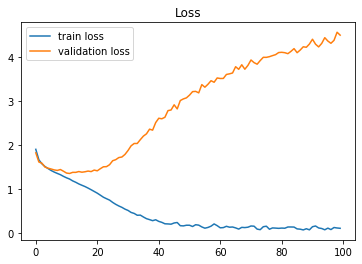

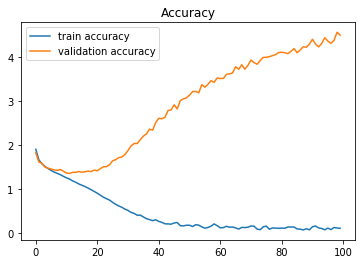

In [13]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']

train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

plt.plot(range(len(train_loss)), train_loss, label = 'train loss')
plt.plot(range(len(valid_loss)), valid_loss, label = 'validation loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(range(len(train_acc)), train_loss, label = 'train accuracy')
plt.plot(range(len(valid_acc)), valid_loss, label = 'validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢


2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [16]:
model = build_mlp()

opt = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)

In [17]:
model.fit(x_train,y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.1090 - acc: 0.2455 - val_loss: 1.9607 - val_acc: 0.3151
Epoch 2/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.9006 - acc: 0.3334 - val_loss: 1.8591 - val_acc: 0.3519
Epoch 3/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.8256 - acc: 0.3601 - val_loss: 1.7947 - val_acc: 0.3725
Epoch 4/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.7754 - acc: 0.3791 - val_loss: 1.7465 - val_acc: 0.3915
Epoch 5/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.7334 - acc: 0.3897 - val_loss: 1.7077 - val_acc: 0.4051
Epoch 6/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.6999 - acc: 0.4038 - val_loss: 1.6882 - val_acc: 0.4038
Epoch 7/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.6722 - acc: 0.4122 - val_l

Epoch 59/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.0960 - acc: 0.6149 - val_loss: 1.3511 - val_acc: 0.5260
Epoch 60/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.1016 - acc: 0.6149 - val_loss: 1.3168 - val_acc: 0.5354
Epoch 61/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.0908 - acc: 0.6183 - val_loss: 1.3149 - val_acc: 0.5347
Epoch 62/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.0830 - acc: 0.6203 - val_loss: 1.3278 - val_acc: 0.5252
Epoch 63/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.0761 - acc: 0.6251 - val_loss: 1.3181 - val_acc: 0.5347
Epoch 64/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.0626 - acc: 0.6299 - val_loss: 1.3054 - val_acc: 0.5353
Epoch 65/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.0572 - acc: 0.6294 - val_loss: 1.3137 - val_acc: 0.5391
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.7070 - acc: 0.7576 - val_loss: 1.4558 - val_acc: 0.5294
Epoch 118/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.6978 - acc: 0.7597 - val_loss: 1.5067 - val_acc: 0.5283
Epoch 119/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.6949 - acc: 0.7622 - val_loss: 1.4106 - val_acc: 0.5409
Epoch 120/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.6735 - acc: 0.7693 - val_loss: 1.5068 - val_acc: 0.5255
Epoch 121/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.6864 - acc: 0.7635 - val_loss: 1.4386 - val_acc: 0.5380
Epoch 122/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.6599 - acc: 0.7741 - val_loss: 1.4869 - val_acc: 0.5353
Epoch 123/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.6598 - acc: 0.7730 - val_loss: 1.4617 - val_acc: 0.5364
Epoch 

Epoch 175/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.3742 - acc: 0.8780 - val_loss: 1.7805 - val_acc: 0.5325
Epoch 176/500
50000/50000 [==============================] - 11s 225us/step - loss: 0.3606 - acc: 0.8834 - val_loss: 1.7951 - val_acc: 0.5351
Epoch 177/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.3688 - acc: 0.8796 - val_loss: 1.8272 - val_acc: 0.5281
Epoch 178/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.3298 - acc: 0.8967 - val_loss: 1.8155 - val_acc: 0.5338
Epoch 179/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.3457 - acc: 0.8901 - val_loss: 1.8979 - val_acc: 0.5210
Epoch 180/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.3318 - acc: 0.8957 - val_loss: 1.8230 - val_acc: 0.5321
Epoch 181/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.3328 - acc: 0.8945 - val_loss: 1.8958 - val_acc: 0.5290
Epoch 

Epoch 233/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.1448 - acc: 0.9600 - val_loss: 2.3837 - val_acc: 0.5244
Epoch 234/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.1521 - acc: 0.9569 - val_loss: 2.3294 - val_acc: 0.5250
Epoch 235/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.1375 - acc: 0.9637 - val_loss: 2.3001 - val_acc: 0.5233
Epoch 236/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.1422 - acc: 0.9606 - val_loss: 2.4520 - val_acc: 0.5213
Epoch 237/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.1408 - acc: 0.9626 - val_loss: 2.3083 - val_acc: 0.5333
Epoch 238/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.1142 - acc: 0.9723 - val_loss: 2.3841 - val_acc: 0.5323
Epoch 239/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.1082 - acc: 0.9752 - val_loss: 2.4886 - val_acc: 0.5230
Epoch 

Epoch 291/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0337 - acc: 0.9965 - val_loss: 2.7556 - val_acc: 0.5327
Epoch 292/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0316 - acc: 0.9967 - val_loss: 2.7655 - val_acc: 0.5352
Epoch 293/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0306 - acc: 0.9969 - val_loss: 2.7631 - val_acc: 0.5380
Epoch 294/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0326 - acc: 0.9962 - val_loss: 2.7939 - val_acc: 0.5298
Epoch 295/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0332 - acc: 0.9965 - val_loss: 2.7727 - val_acc: 0.5349
Epoch 296/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0349 - acc: 0.9960 - val_loss: 2.8214 - val_acc: 0.5312
Epoch 297/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0295 - acc: 0.9972 - val_loss: 2.7837 - val_acc: 0.5394
Epoch 298/500

Epoch 349/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.0097 - acc: 0.9999 - val_loss: 3.0667 - val_acc: 0.5345
Epoch 350/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.0105 - acc: 0.9998 - val_loss: 3.0663 - val_acc: 0.5364
Epoch 351/500
50000/50000 [==============================] - 11s 225us/step - loss: 0.0098 - acc: 0.9998 - val_loss: 3.0717 - val_acc: 0.5359
Epoch 352/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.0091 - acc: 0.9999 - val_loss: 3.0761 - val_acc: 0.5358
Epoch 353/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.0101 - acc: 0.9998 - val_loss: 3.0727 - val_acc: 0.5356
Epoch 354/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.0099 - acc: 0.9997 - val_loss: 3.0773 - val_acc: 0.5388
Epoch 355/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 3.0885 - val_acc: 0.5364
Epoch 

Epoch 407/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 3.2576 - val_acc: 0.5368
Epoch 408/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 3.2548 - val_acc: 0.5347
Epoch 409/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.2588 - val_acc: 0.5378
Epoch 410/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 3.2690 - val_acc: 0.5348
Epoch 411/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.2644 - val_acc: 0.5350
Epoch 412/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.2655 - val_acc: 0.5331
Epoch 413/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.2696 - val_acc: 0.5367
Epoch 414/500

50000/50000 [==============================] - 8s 168us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.3741 - val_acc: 0.5362
Epoch 466/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.3796 - val_acc: 0.5363
Epoch 467/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.3793 - val_acc: 0.5364
Epoch 468/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.3808 - val_acc: 0.5365
Epoch 469/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.3850 - val_acc: 0.5350
Epoch 470/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.3840 - val_acc: 0.5346
Epoch 471/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.3900 - val_acc: 0.5352
Epoch 472/500
50000/50000 [

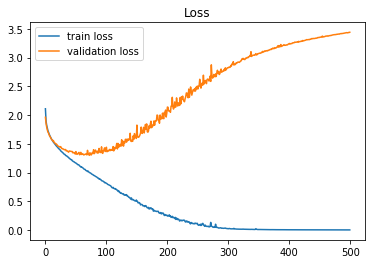

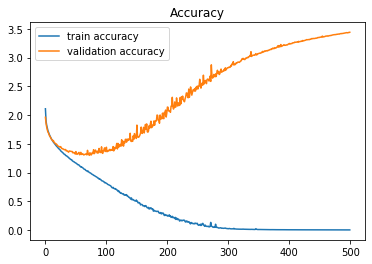

In [18]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']

train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

plt.plot(range(len(train_loss)), train_loss, label = 'train loss')
plt.plot(range(len(valid_loss)), valid_loss, label = 'validation loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(range(len(train_acc)), train_loss, label = 'train accuracy')
plt.plot(range(len(valid_acc)), valid_loss, label = 'validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()